In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
house_data = pd.read_csv("house_data_added_columns.csv")

In [20]:
house_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,60
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,64
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,82
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,50
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,28


## Shape the Data

In [51]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = house_data[['bedrooms','bathrooms','sqft_living','age','zipcode','floors','waterfront','sqft_lot']]
y = house_data[['price']]

print("Shape: ", X.shape, y.shape)


Shape:  (21613, 8) (21613, 1)


In [52]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [53]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [54]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [55]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

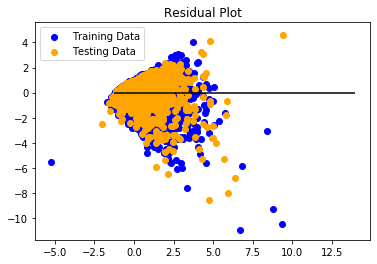

In [56]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [57]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.46957727124623805, R2: 0.5924631106762397


In [61]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions2 = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions2)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.47107233663221215, R2: 0.5911655727968648


In [59]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions3 = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions3)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4695772898279554, R2: 0.5924630945495322


In [50]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions4 = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions4)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4712369505691807, R2: 0.5910227075946511
